# Estimação de Estados do Sistema Elétrico de Potência (EESEP)

O processo de Estimação de Estados pode ser **Dinâmico** ou **Estático**.

* **Estimador Dinâmico**
> As variações das grandezas no tempo são consideradas na modelagem da rede.


* **Estimador Estático**
> Considera o modelo de rede estático ("foto do sistema"), representado por equações algébricas não-lineares. É o tipo mais utilizado, devido ao baixo número de medidas e falta de sincronismo.


O Estimador de Estados é utilizado para cálculo das variáveis de estado desconhecidas por meio de um conjunto de medidas não exatas. Logo, o resultado obtido também não será exato.

O problema de estimação de estados consiste em encontrar uma forma de atingir a melhor estimativa das variáveis desconhecidas. O critério estatístico mais utilizado para isso é o de Mínimos Quadrados Ponderados (WLS, do inglês *Weighted Least Squares*. Este método funciona bem para erros Gaussianos, mas falha quando há um ou mais erros grosseiros (EG)

>**NOTA:** Uma medida é portadora de Erro Grosseiro quando apresenta grau de imprecisão muito maior do que é suposto no modelo de medição. Mais precisamente, uma medida possui EG se a mesma desvia do valor "verdadeiro" de, no mínimo, 3 vezes o desvio padrão.

Para superar essa limitação, métodos para detecção e identificação de EG foram desenvolvidos, sendo os mais utilizados baseados na análise estatística dos resíduos das medidas. Os resíduos fornecem informações úteis sobre eventuais violações das suposições feitas em relação ao modelo de medição.

### Resíduos das medidas

São as diferenças entre os valores estimados e aqueles medidos, dadas por:

$r = z - \hat{z}$
***
Diversos estimadores WLS com maior resíduo normalizado (WLS + $r^{N}$) foram aplicados em SEP, sendo os mais importantes:
* Estimador de Máximo Valor Absoluto Ponderado
* Estimador de Mínima Meadiana do Resíduo ao Quadrado

## Estimador de Estados Estático Linear por Mínimos Quadrados (LS)

Consideremos um sistema de 2 barras a seguir (modelo linear).


In [1]:
import SchemDraw as schem
import SchemDraw.elements as e

d = schem.Drawing()
d.add(e.VDD, lftlabel='1', zoom=3)
d.add(e.LINE, zoom=0.5)
d.add(e.DOT, botlabel='$P_{12}^{m}$')
d.add(e.RBOX, label='$x_{12}$ = 1 pu')
d.add(e.DOT, botlabel='$P_{21}^{m}$')
d.add(e.LINE, zoom=0.5)
B2 = d.add(e.VDD, rgtlabel='2', zoom=3)
d.add(e.GND_SIG, zoom=0.75, xy=[5.7,1.8], label='$P_{2}^{m}$')


d.draw()

* Variáveis de Estado: $\theta_{1}$, $\theta_{2}$
    * $\theta_{1}$ é definida como referência: $\theta_{1} = 0$


* Medidas: $P_{12}^{m}$, $P_{21}^{m}$ e $P_{2}^{m}$

>$m = 3 \rightarrow$ número de medidas

>$n = 2 \rightarrow$ número de barras

>$N = 1 \rightarrow$ número de variáveis de estado para estimar

### Modelo de Medição

Qualquer medida possui ruído inerente ao processo de medição.

$P_{12}^{m} = \underbrace{P_{12}^{v}}_\text{valor verdadeiro} + \underbrace{\omega_{P_{12}}}_\text{ruído}$

A equação do fluxo de potência linear é dada por:

$P_{km} = \frac{\theta_{k} - \theta_{l}}{x_{km}}$

Logo:

$
\begin{cases}
P_{12}^{m} = \frac{\theta_{1} - \theta_{2}}{x_{12}} + \omega_{P_{12}}\\
\\
P_{21}^{m} = \frac{\theta_{2} - \theta_{1}}{x_{12}} + \omega_{P_{21}} \\
\\
P_{2}^{m} = \frac{\theta_{2} - \theta_{1}}{x_{12}} + \omega_{P_{2}}
\end{cases}
$

Na forma matricial, o sistema pode ser reescrito como:

$
\begin{bmatrix}
P_{12}^{m} \\
P_{21}^{m} \\
P_{2}^{m}
\end{bmatrix}
=
\begin{bmatrix}
1 & -1 \\
-1 & 1 \\
-1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_{1} \\
\theta_{2}
\end{bmatrix}
+
\begin{bmatrix}
\omega_{P_{12}} \\
\omega_{P_{21}} \\
\omega_{P_{2}}
\end{bmatrix}
\leftrightarrow
z = Hx^{v} + \omega
$

onde:

$z \rightarrow$ vetor de medidas $(m\times 1)$

$H \rightarrow$ Jacobiana que relacionas medidas e variáveis de estado $(m\times n)$

$x^{v} \rightarrow$ vetor de variáveis de estado verdadeiras $(n\times 1)$

$\omega \rightarrow$ vetor de ruídos $(m\times 1)$


Os erros das medidas são considerados como variáveis aleatórias independentes, com distribuição Gaussiana de média zero e variância conhecida.

### Método dos Mínimos Quadrados (LS)

O Método dos Mínimos Quadrados minimiza a soma dos quadrados das diferenças entre o valor medido e o estimado. A partir do estimador LS, a estimativa do vetor $x^{v}$, designado por $\hat{x}$, é obtida determinando o valor de x que torna mínimo o índice $J(x)$, dado por:

$
\begin{array}[ccccc]
JJ(x) & = & \displaystyle\sum_{i=1}^{m} \omega_{i}^{2} & = & \omega^{T}\cdot\omega \\
\\
 & & & = & (z - Hx)^{T}(z - Hx) \\
\\
 & & & = & z^{T}z - z^{T}Hx - x^{T}H^{T}z + x^{T}H^{T}Hx
\end{array}
$

Tem-se que:

$
z^{T}Hx = x^{T}H^{T}z \rightarrow escalar
$

Logo:

$
J(x) = z^{T}z - 2z^{T}Hx + x^{T}H^{T}Hx
$

> #### Minimizando $J(x)$

> Como estamos minimizando, x vira $\hat{x}$ (valor estimado).

>$
\frac{\partial J(x)}{\partial x} = 0 - 2H^{T}z + 2H^{T}H\hat{x} = 0 \Rightarrow \\
\\
\Rightarrow \hat{x} = (H^{T}H)^{-1}\cdot H^{T}z = G^{-1}H^{T}z
$

## Estimador de Estados Estático Linear por Mínimos Quadrados Ponderados (WLS)

Pondera as medidas de acordo com a precisão dos respectivos medidores.

**Hipótese 1:** Considera-se que os erros das medidas são Gaussianos (seguem uma distribuição normal).


### Distribuição Normal

Definida pela seguinte Função Densidade de Probabilidade:

$
f(\omega_{i}) = \frac{1}{\sigma_{i}\sqrt{2\pi}}e^{(\omega_{i} - \mu_{i})^{2}/2\sigma_{i}^{2}}
$

onde:

$\mu_{i} \rightarrow$ média

$\sigma_{i} \rightarrow$ desvio padrão

$\sigma_{i}^{2} \rightarrow$ variância

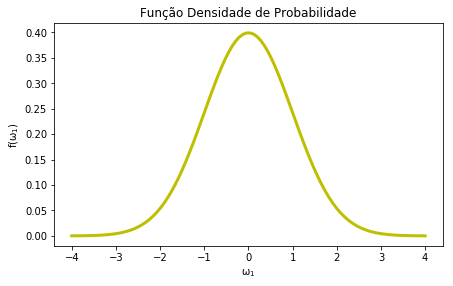

In [2]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 0., 1.
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-4,4,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{1}$')
plt.ylabel('$f(\omega_{1})$')
plt.show()

Em EESEP, $\mu_{i}$ é zero (caso o medidor não esteja polarizado, ou seja, não possui erro sistemático) e $\sigma_{i}^{2}$ é conhecida.

Quanto menor é o valor de $\sigma_{i}^{2}$, melhor é a medida. Consequentemente, o peso (ponderação) mais utilizado é o inverso da variância do erro, $\frac{1}{\sigma_{i}^{2}}$.

Considerando esta ponderação, $J(x)$ torna-se:

$
J(x) = \displaystyle\sum_{i=1}^{m}\left(\frac{\omega_{i}}{\sigma_{i}}\right)^{2} = \omega_{i}^{T}\cdot W\cdot\omega_{i}
$

onde:

$W \rightarrow$ matriz de ponderação. É a inversa da matriz de covariância dos erros das medidas. Esta é uma matriz diagonal.

### Modelo Linear Ponderado

$
z = Hx^{v} + \omega \Rightarrow \omega = z - Hx^{v}
$

$
J(x) = (z - Hx)^{T}\cdot W \cdot (z - Hx)
$

Considerando $W = W^{1/2}\cdot W^{1/2}:$

$
J(x) = (z - Hx)^{T}\cdot W^{1/2}\cdot W^{1/2} \cdot (z - Hx)
$

$
J(x) = (\underbrace{W^{1/2}z}_{\tilde{z}} - \underbrace{W^{1/2}H}_{\tilde{H}}x)^{T}\cdot (W^{1/2}z - W^{1/2}Hx)
$

$
J(x) = (\tilde{z} - \tilde{H}x)^{T} \cdot (\tilde{z} - \tilde{H}x)
$

Por analogia com o modelo sem ponderação:

$
\hat{x} = (\tilde{H}^{T}\tilde{H})^{-1}\tilde{H}^{T}\tilde{z} = {\underbrace{(H^{T}WH)}_{G}}^{-1}H^{T}Wz
$

>**NOTA:** Um vetor muito importante para o processo de EESEP é o vetor de resíduos de estimação $(r)$ que é a diferença entre os valores medido e estimado.

>$r = z - \hat{z} = z - H\hat{x}$

***

**Exemplo:** analisando a precisão de medidores.

$
z^{v} = 
\begin{bmatrix}
P \\
V
\end{bmatrix}
=
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$

$
W =
\begin{bmatrix}
1 & 0 \\
0 & 10
\end{bmatrix}
$

* Para a medida de potência: $\frac{1}{\sigma_{P}^{2}} = 1 \Rightarrow \sigma_{P} = 1$:

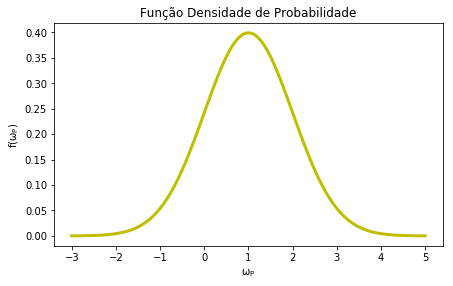

In [11]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 1., 1.
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-3,5,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{P}$')
plt.ylabel('$f(\omega_{P})$')
plt.show()

* Para a medida de potência: $\frac{1}{\sigma_{V}^{2}} = 10 \Rightarrow \sigma_{P} = \sqrt{\frac{1}{10}} \approx 0,32$:

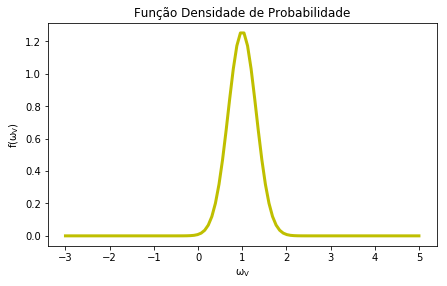

In [9]:
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 1., 1/np.sqrt(10.)
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
bins = np.linspace(-3,5,100)

# Plot the distribution curve
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)), linewidth=3, color='y')
plt.title('Função Densidade de Probabilidade')
plt.xlabel('$\omega_{V}$')
plt.ylabel('$f(\omega_{V})$')
plt.show()

Para este exemplo, aceitam-se valores para potência entre $-2$ e $4 \ pu$ e, para tensão, entre $0,04$ e $1,96 \ pu$.

***

## Distribuição Normal (ou Gaussiana)

> **Notação:** $X \sim N(\mu_{x}, \sigma_{x}^{2})$